# Lab Instructions

You have been hired by James Cameron to create profiles of two characters for a reboot of the Titanic Movie: one that is most likely to survive the sinking and one that is least likely to survive.  Mr. Cameron wants this reboot to be as historically accurate as possible, so your profile of each character should be backed up with data and visualizations.

Each character profile should include information on their:
* Age, fare
* Sex
* Passenger class
* Travel companions (including both parents/children and siblings/spouse)
* Port of departure (indicated by the Embarked feature in the dataset)

For quantitative features like `Age` and `Fare`, you will need to use the `.loc` method we learned in class (or something similar) to place individuals in categories.  How you choose to do this is up to you, but make sure you explain your reasoning.

You should include at least one visualization for each element of the character profile (age, sex, passenger class, etc.) as evidence.

After you have developed your two character profiles, use your Pandas data wrangling skills to identify at least one real passenger in the dataset that fits each profile.  Print out the names of these individuals.  Look them up in [Encyclopeida Titanica](https://www.encyclopedia-titanica.org/) (or a similar resource).  

Tell Mr. Cameron at least one thing about the real passengers who fit your two character profiles that you learned from an external resource.  You need one interesting fact about a person who fits the profile of "most likely to survive" and one interesting fact about a person who fits the profile of "least likely to surivive".  



In [143]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('titanic_passengers.csv')
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


C:\Users\preze\AppData\Local\Temp\ipykernel_39116\104950288.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_counts = df.groupby(['AgeGroup', 'Survived']).size().unstack()


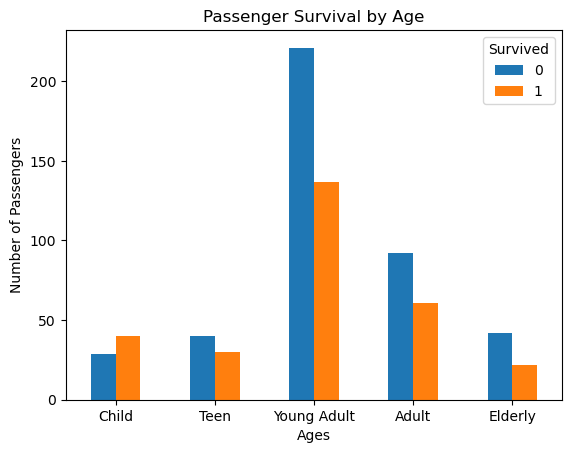

Survival % by Age:
AgeGroup
Child          57.971014
Teen           42.857143
Young Adult    38.268156
Adult          39.869281
Elderly        34.375000
Name: Survived, dtype: float64


C:\Users\preze\AppData\Local\Temp\ipykernel_39116\104950288.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_age = df.groupby('AgeGroup')['Survived'].mean() * 100


In [144]:
import seaborn as sns
df['AgeGroup'] = pd.cut(df['Age'], bins=[0,12,18,35,50,80], labels=['Child','Teen','Young Adult','Adult','Elderly'])

survival_counts = df.groupby(['AgeGroup', 'Survived']).size().unstack()
survival_counts.plot(kind='bar')

plt.title("Passenger Survival by Age")
plt.xlabel("Ages")
plt.ylabel("Number of Passengers")
plt.legend(title="Survived", labels=["0", "1"])
plt.xticks(rotation=360)
plt.show()

# Confirmation
survival_by_age = df.groupby('AgeGroup')['Survived'].mean() * 100

print("Survival % by Age:")
print(survival_by_age)

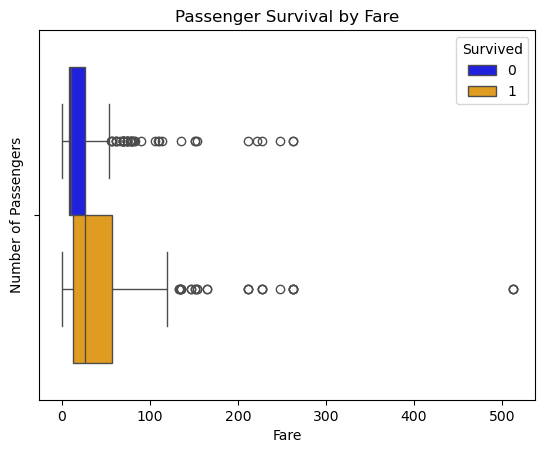

Survival % by Fare:
Fare
0-25       29.335793
26-50      41.954023
51-100     65.420561
101-250    72.727273
251-600    77.777778
Name: Survived, dtype: float64


C:\Users\preze\AppData\Local\Temp\ipykernel_39116\55535458.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_fare = df.groupby(fare_bins)['Survived'].mean() * 100


In [145]:
sns.boxplot(data=df, x='Fare', hue='Survived', palette=['blue','orange'])

plt.title("Passenger Survival by Fare")
plt.xlabel("Fare")
plt.ylabel("Number of Passengers")
plt.legend(title="Survived", labels=["0", "1"])
plt.show()

# Confirmation

fare_bins = pd.cut(df['Fare'], bins=[0, 25, 50, 100, 250, 600], labels=['0-25', '26-50', '51-100', '101-250', '251-600'])
survival_by_fare = df.groupby(fare_bins)['Survived'].mean() * 100

print("Survival % by Fare:")
print(survival_by_fare)

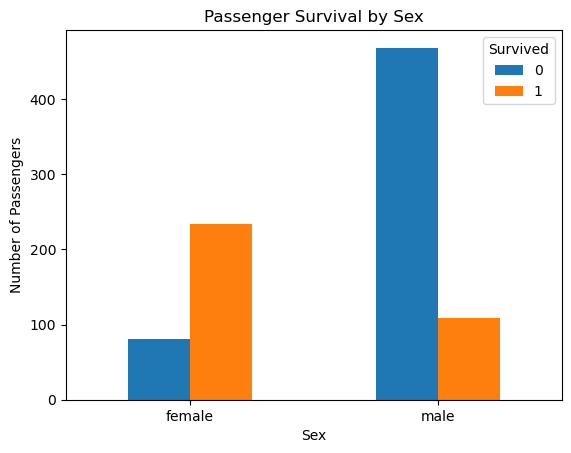

Survival % by Sex:
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


In [131]:
survival_counts_sex = df.groupby(['Sex', 'Survived']).size().unstack()


survival_counts_sex.plot(kind='bar')

plt.title("Passenger Survival by Sex")
plt.xlabel("Sex")
plt.ylabel("Number of Passengers")
plt.legend(title="Survived", labels=["0", "1"])
plt.xticks(rotation=360)
plt.show()

#Confirmation
survival_by_sex = df.groupby('Sex')['Survived'].mean() * 100

print("Survival % by Sex:")
print(survival_by_sex)

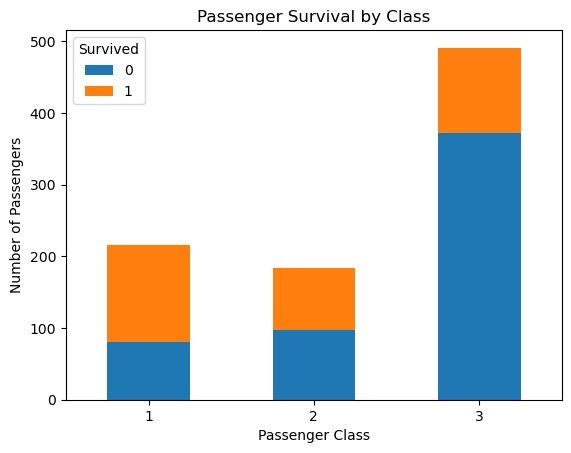

Survival % by Passenger Class:
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


In [123]:
pclass_counts = df.groupby(['Pclass', 'Survived']).size().unstack()


pclass_counts.plot(kind='bar', stacked=True)

plt.title("Passenger Survival by Class")
plt.xlabel("Passenger Class")
plt.ylabel("Number of Passengers")
plt.legend(title="Survived", labels=["0", "1"])
plt.xticks(rotation=360)
plt.show()

# Confirmation
survival_by_class = df.groupby('Pclass')['Survived'].mean() * 100

print("Survival % by Passenger Class:")
print(survival_by_class)

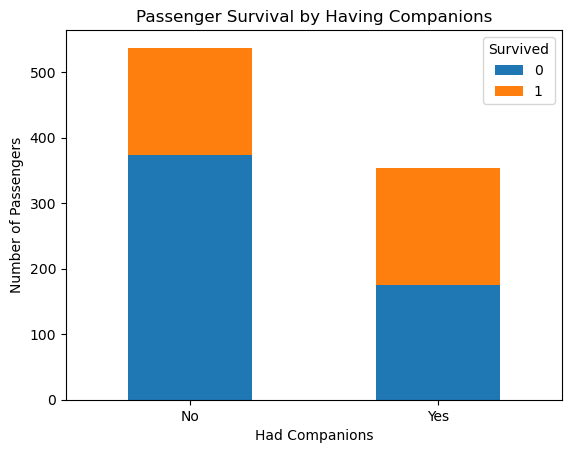

Survival % by Having Companions:
HasCompanions
False    30.353818
True     50.564972
Name: Survived, dtype: float64


In [124]:
df['FamilySize'] = df['SibSp'] + df['Parch']
df['HasCompanions'] = df['FamilySize'].apply(lambda x: 'Yes' if x > 0 else 'No')

companion_counts = df.groupby(['HasCompanions', 'Survived']).size().unstack(fill_value=0)
companion_counts.plot(kind='bar', stacked=True)

plt.title("Passenger Survival by Having Companions")
plt.xlabel("Had Companions")
plt.ylabel("Number of Passengers")
plt.xticks(rotation=0)
plt.legend(title="Survived", labels=["0", "1"])
plt.show()

# Confirmation

df['HasCompanions'] = (df['SibSp'] + df['Parch'] > 0)

survival_by_companions = df.groupby('HasCompanions')['Survived'].mean() * 100

print("Survival % by Having Companions:")
print(survival_by_companions)

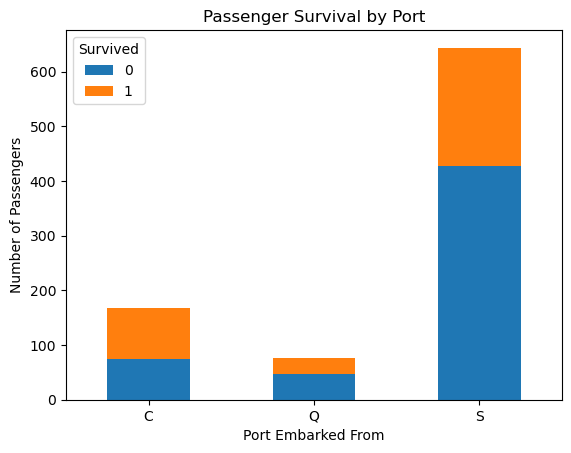

Survival % by Port:
Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64


In [146]:
port_counts = df.groupby(['Embarked', 'Survived']).size().unstack()
port_counts.plot(kind='bar', stacked=True)

plt.title("Passenger Survival by Port")
plt.xlabel("Port Embarked From")
plt.ylabel("Number of Passengers")
plt.xticks(rotation=360)
plt.legend(title="Survived", labels=["0", "1"])
plt.show()

# Confirmation
survival_by_port = df.groupby('Embarked')['Survived'].mean() * 100

print("Survival % by Port:")
print(survival_by_port)

In [158]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 50, 80], labels=['Child','Teen','Young Adult','Adult','Elderly'])
df['HasCompanions'] = (df['SibSp'] + df['Parch'] > 0)


columns = ['Pclass', 'Sex', 'AgeGroup', 'Embarked', 'HasCompanions']

for col in columns:
    survival = df.groupby(col)['Survived'].mean() * 100
    high = survival.idxmax()
    low = survival.idxmin()
    
    print(f"\nSURVIVAL BY {col}")
    print(f"HIGHEST: {high} → {survival[high]:.2f}%")
    print(f"LOWEST:  {low} → {survival[low]:.2f}%\n")
    print("Highest Survival Group:")
    print(df.loc[df[col] == high, 'Name'].head(5).tolist())
    print("Lowest Survival Group:")
    print(df.loc[df[col] == low, 'Name'].head(5).tolist())


SURVIVAL BY Pclass
HIGHEST: 1 → 62.96%
LOWEST:  3 → 24.24%

Highest Survival Group:
['Cumings, Mrs. John Bradley (Florence Briggs Thayer)', 'Futrelle, Mrs. Jacques Heath (Lily May Peel)', 'McCarthy, Mr. Timothy J', 'Bonnell, Miss. Elizabeth', 'Sloper, Mr. William Thompson']
Lowest Survival Group:
['Braund, Mr. Owen Harris', 'Heikkinen, Miss. Laina', 'Allen, Mr. William Henry', 'Moran, Mr. James', 'Palsson, Master. Gosta Leonard']

SURVIVAL BY Sex
HIGHEST: female → 74.20%
LOWEST:  male → 18.89%

Highest Survival Group:
['Cumings, Mrs. John Bradley (Florence Briggs Thayer)', 'Heikkinen, Miss. Laina', 'Futrelle, Mrs. Jacques Heath (Lily May Peel)', 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)', 'Nasser, Mrs. Nicholas (Adele Achem)']
Lowest Survival Group:
['Braund, Mr. Owen Harris', 'Allen, Mr. William Henry', 'Moran, Mr. James', 'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard']

SURVIVAL BY AgeGroup
HIGHEST: Child → 57.97%
LOWEST:  Elderly → 34.38%

Highest Survival Gro

C:\Users\preze\AppData\Local\Temp\ipykernel_39116\131220144.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival = df.groupby(col)['Survived'].mean() * 100


The person who is most likely to survive would be someone who: Was a child, had a fare of 251-600, was female, was first class, had traveled with a companion, and embarked from C port.
The person who is least likely to survive would be someone who: Was elderly, had a fare of 0-25, was male, was third class, didn't travel with a companion, and embarked from S port. 
Florence Briggs Thayer fits as someone most likely to survive: She was one of the first groups to board the lifeboats. She originally refused to board lifeboat 4 without her husband, but eventually agreed to after he promised to get on a later boat to evacuate. He, unfortunately, eventually drowned going down with the ship. 

William Henry Allen fits as someone least likely to survive: He bought his ticket for eight pounds (around 1,585 dollars today), at the time of his death, his entire estate was only worth 167 (around 33,040 dollars today). He planned to get a job in the US to afford a better life for him and his children.